# Project: Investigating TMDb Movie Data

# TMDb Movie Data:

The dataset being explored in this project consists of ~10,000 Movies and was originally retrieved from Kaggle. Each movie includes information on its Budget, Popularity, and Revenue.

# Exploration Questions:

How is the revenue of a movie affected by its popularity?

What correlations are there between the budget of a movie and its popularity?

Based on the information from the above comparisons, how do revenue and budget compare?

In [166]:
# Import statements
%pylab inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Loading the Data Set and seeing what it looks like
movies_df = pd.read_csv('tmdb-movies.csv')
movies_df.head()

Populating the interactive namespace from numpy and matplotlib


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


# Data Cleaning

1) Sizing Data
    - Getting rid of null/na/useless values/lower outliers
    - Removing Duplicates

2) Grouping movies
    - Creating values to group by Popularity

In [167]:
# Implicitly dropping null/na/useless values/lower outliers
new_df = movies_df[movies_df['budget'] > 1000]
new_df = new_df[new_df['popularity'] > 0]
new_df = new_df[new_df['revenue'] > 1000]

# Found any duplicates within the data frame and removing them
new_df.duplicated().sum()
new_df.drop_duplicates(inplace=True)

# Confirming removal of duplicates
new_df.info()

# Creating copies of the new dataframe to use
copy_df = new_df.copy(deep=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3819 entries, 0 to 10848
Data columns (total 21 columns):
id                      3819 non-null int64
imdb_id                 3819 non-null object
popularity              3819 non-null float64
budget                  3819 non-null int64
revenue                 3819 non-null int64
original_title          3819 non-null object
cast                    3815 non-null object
homepage                1416 non-null object
director                3818 non-null object
tagline                 3546 non-null object
keywords                3686 non-null object
overview                3819 non-null object
runtime                 3819 non-null int64
genres                  3819 non-null object
production_companies    3775 non-null object
release_date            3819 non-null object
vote_count              3819 non-null int64
vote_average            3819 non-null float64
release_year            3819 non-null int64
budget_adj              3819 non-null flo

In [168]:
# Groups by the field name based on the restriction values of the range
def groupValues(field_name, values):
    for n in range(1, len(values)):
        copy_df.loc[(copy_df[field_name] > values[n-1]) & (copy_df[field_name] <= values[n]), field_name] = n
    print(copy_df[copy_df['popularity'] == 1].count())
    print(copy_df[copy_df['popularity'] == 2].count())
    print(copy_df[copy_df['popularity'] == 3].count())

In [169]:
restrictions = [-1, 1, 2, 3, 4, 5, 10, 15, 35]
name = 'popularity'

groupValues(name, restrictions)

id                      2298
imdb_id                 2298
popularity              2298
budget                  2298
revenue                 2298
original_title          2298
cast                    2294
homepage                 643
director                2297
tagline                 2060
keywords                2184
overview                2298
runtime                 2298
genres                  2298
production_companies    2254
release_date            2298
vote_count              2298
vote_average            2298
release_year            2298
budget_adj              2298
revenue_adj             2298
dtype: int64
id                      979
imdb_id                 979
popularity              979
budget                  979
revenue                 979
original_title          979
cast                    979
homepage                416
director                979
tagline                 950
keywords                962
overview                979
runtime                 979
genres        

In [170]:
# Confirming groupby popularity for revenue and budget values
print("Revenue:")
print(copy_df.groupby('popularity').mean()['revenue'])
print()
print("Budget:")
print(copy_df.groupby('popularity').mean()['budget'])

Revenue:
popularity
1.0    4.432478e+07
2.0    1.328997e+08
3.0    2.346857e+08
4.0    3.256799e+08
5.0    4.961875e+08
6.0    5.864303e+08
7.0    8.016067e+08
8.0    8.379059e+08
Name: revenue, dtype: float64

Budget:
popularity
1.0    2.383699e+07
2.0    4.685689e+07
3.0    6.434009e+07
4.0    7.428783e+07
5.0    1.095625e+08
6.0    1.092847e+08
7.0    1.320000e+08
8.0    1.550000e+08
Name: budget, dtype: float64


# Data Visualization

1) Plotting Revenue by Popularity
    - Bar Plot
    - Line Plot
    
2) Plotting Budget by Popularity
    - Bar Plot
    - Line Plot
    
3) Plotting Budget by Revenue
    - Bar Plot
    - Line Plot

Text(0,0.5,'Revenue')

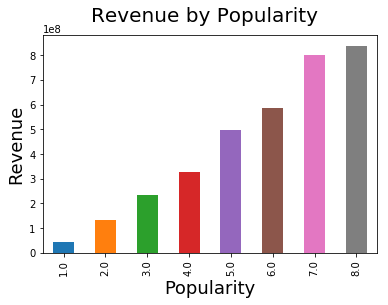

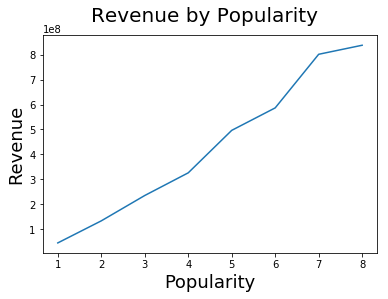

In [171]:
# Grouping data by popularity and plotting revenue

# Bar Plot
fig = plt.figure()
copy_df.groupby('popularity').mean()['revenue'].plot(kind='bar')
fig.suptitle('Revenue by Popularity', fontsize=20)
plt.xlabel('Popularity', fontsize=18)
plt.ylabel('Revenue', fontsize=18)

# Line Plot
fig = plt.figure()
copy_df.groupby('popularity').mean()['revenue'].plot(kind='line')
fig.suptitle('Revenue by Popularity', fontsize=20)
plt.xlabel('Popularity', fontsize=18)
plt.ylabel('Revenue', fontsize=18)

As popularity increased, revenue seemed to be proportionally related and increased. This tells me that revenue may have dependence on the popularity of a movie.

Text(0,0.5,'Budget')

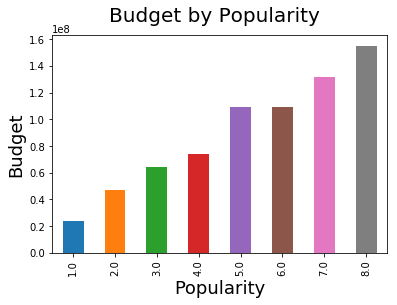

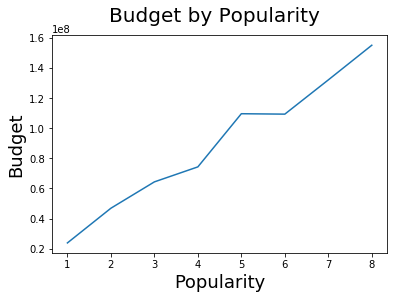

In [172]:
# Grouping data by popularity and plotting budget

# Bar Plot
fig = plt.figure()
copy_df.groupby('popularity').mean()['budget'].plot(kind='bar')
fig.suptitle('Budget by Popularity', fontsize=20)
plt.xlabel('Popularity', fontsize=18)
plt.ylabel('Budget', fontsize=18)

# Line Plot
fig = plt.figure()
copy_df.groupby('popularity').mean()['budget'].plot(kind='line')
fig.suptitle('Budget by Popularity', fontsize=20)
plt.xlabel('Popularity', fontsize=18)
plt.ylabel('Budget', fontsize=18)

As Population increased, budget increased. However, there is a break in this trend between a popularity of 4 and 6, which shows us that the budget of movies that received the popularity value that corresponds to 5 or 6 have had the same budget, but were different in popularity. This tells me that the popularity of a movie may be heavily influenced by its budget, but not completely dependent. 

In [173]:
# Creating a range for grouping movies by similar revenue values
restrictions = [-1, 20000000, 75000000, 200000000, 5000000000]
name = 'revenue'

groupValues(name, restrictions)

id                      2298
imdb_id                 2298
popularity              2298
budget                  2298
revenue                 2298
original_title          2298
cast                    2294
homepage                 643
director                2297
tagline                 2060
keywords                2184
overview                2298
runtime                 2298
genres                  2298
production_companies    2254
release_date            2298
vote_count              2298
vote_average            2298
release_year            2298
budget_adj              2298
revenue_adj             2298
dtype: int64
id                      979
imdb_id                 979
popularity              979
budget                  979
revenue                 979
original_title          979
cast                    979
homepage                416
director                979
tagline                 950
keywords                962
overview                979
runtime                 979
genres        

In [174]:
# Confirming the revenue grouping worked
print(copy_df[copy_df['revenue'] == 1].count())
print(copy_df[copy_df['revenue'] == 2].count())
copy_df[copy_df['revenue'] == 3].count()

id                      1200
imdb_id                 1200
popularity              1200
budget                  1200
revenue                 1200
original_title          1200
cast                    1197
homepage                 361
director                1199
tagline                 1022
keywords                1118
overview                1200
runtime                 1200
genres                  1200
production_companies    1163
release_date            1200
vote_count              1200
vote_average            1200
release_year            1200
budget_adj              1200
revenue_adj             1200
dtype: int64
id                      1178
imdb_id                 1178
popularity              1178
budget                  1178
revenue                 1178
original_title          1178
cast                    1177
homepage                 360
director                1178
tagline                 1106
keywords                1146
overview                1178
runtime                 1178
g

id                      853
imdb_id                 853
popularity              853
budget                  853
revenue                 853
original_title          853
cast                    853
homepage                339
director                853
tagline                 835
keywords                839
overview                853
runtime                 853
genres                  853
production_companies    852
release_date            853
vote_count              853
vote_average            853
release_year            853
budget_adj              853
revenue_adj             853
dtype: int64

Text(0,0.5,'Budget')

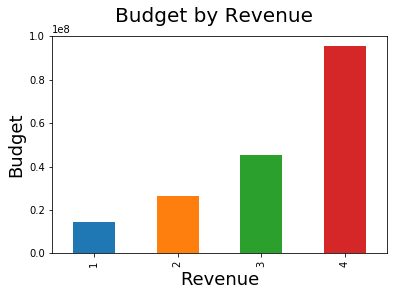

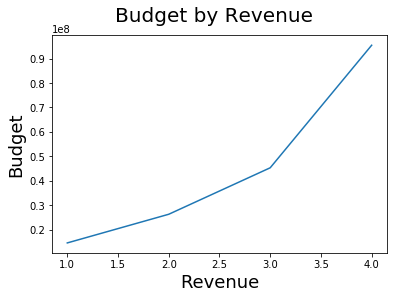

In [175]:
# Comparing Budget and Revenue through a bar and line graph

# Bar Plot
fig = plt.figure()
copy_df.groupby('revenue').mean()['budget'].plot(kind='bar')
fig.suptitle('Budget by Revenue', fontsize=20)
plt.xlabel('Revenue', fontsize=18)
plt.ylabel('Budget', fontsize=18)

# Line Plot
fig = plt.figure()
copy_df.groupby('revenue').mean()['budget'].plot(kind='line')
fig.suptitle('Budget by Revenue', fontsize=20)
plt.xlabel('Revenue', fontsize=18)
plt.ylabel('Budget', fontsize=18)

As revenue increased, budget also increased. The interesting part about the comparison between revenue and budget that is different than the others is that it increases at a faster rate as revenue increases. This tells me that the budget of a movie is often much more as its revenue is higher. The budget of a movie is scaled less when revenue is smaller than when revenue is more. The ratio from the revenue to the budget of a movie is smaller when revenue is below the corresponding value of 2, but the ratio is much bigger when revenue is above the corresponding value of 3.

# Conclusion:

During data cleaning, I selected specific values to get rid of values I thought would scew what I was analyzing. I meant for those values to clean the data set out of the majority of movies that seemed to be too insignificant to be included in what I was analyzing. I created values to create a range of popularity and revenue, so the data visualizations could represent more of average values of popularity and revenue between the comparisons. These range values were based on looking at values within the data set, so they are not meant for specific analysis, but broader analysis. My analysis showed me that the popularity of a movie is influenced, but not dependent on, by its budget. It also showed me that the revenue of a movie has a varying influence on its budget based on what the budget is because the ratio from revenue to budget shows to be inconsistant. During my analysis, there were a few issues I ran into that I had to deal with. Within the data set there were values that were either too low, duplicated, or not filled. These values scewed my analysis initially due to the mass amount of low revenue, budget, and popularity. I wanted to analyze the data that had values above a certain amount to meet my criteria. After grouping the data that met my criteria, I was able to continue with my data analysis, but being limited to only what I have chosen.